Using Gensim

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [ ]:
#Gensim text rank summarization
text = "Cyclone Dumazile was a strong tropical cyclone in the South-West Indian Ocean that affected Madagascar and Réunion in early March 2018. Dumazile originated from a low-pressure area that formed near Agaléga on 27 February. It became a tropical disturbance on 2 March, and was named the next day after attaining tropical storm status. Dumazile reached its peak intensity on 5 March, with 10-minute sustained winds of 165 km/h (105 mph), 1-minute sustained winds of 205 km/h (125 mph), and a central atmospheric pressure of 945 hPa (27.91 inHg). As it tracked southeastwards, Dumazile weakened steadily over the next couple of days due to wind shear, and became a post-tropical cyclone on 7 March before completely dissipating on 10 March. Dumazile dropped torrential rainfall in Réunion and Madagascar—reaching 1,600 mm (63 in) in Salazie and 210 mm (8.3 in) in northeastern Madagascar—causing widespread flooding and damaging crops and infrastructure. Two deaths were caused by Dumazile, both in Madagascar."

In [ ]:
print(summarize(text, ratio=0.5))

Cyclone Dumazile was a strong tropical cyclone in the South-West Indian Ocean that affected Madagascar and Réunion in early March 2018.
As it tracked southeastwards, Dumazile weakened steadily over the next couple of days due to wind shear, and became a post-tropical cyclone on 7 March before completely dissipating on 10 March.
Two deaths were caused by Dumazile, both in Madagascar.


Text_Rank Summarization with NLTK

TextRank is a graph-based algorithm for keyword extraction and text summarization. The algorithm is based on the PageRank algorithm used by Google to rank web pages in their search engine. Here are the steps to implement TextRank algorithm using NLTK in Python:

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from collections import defaultdict

In [ ]:
text = "Cyclone Dumazile was a strong tropical cyclone in the South-West Indian Ocean that affected Madagascar and Réunion in early March 2018. Dumazile originated from a low-pressure area that formed near Agaléga on 27 February. It became a tropical disturbance on 2 March, and was named the next day after attaining tropical storm status. Dumazile reached its peak intensity on 5 March, with 10-minute sustained winds of 165 km/h (105 mph), 1-minute sustained winds of 205 km/h (125 mph), and a central atmospheric pressure of 945 hPa (27.91 inHg). As it tracked southeastwards, Dumazile weakened steadily over the next couple of days due to wind shear, and became a post-tropical cyclone on 7 March before completely dissipating on 10 March. Dumazile dropped torrential rainfall in Réunion and Madagascar—reaching 1,600 mm (63 in) in Salazie and 210 mm (8.3 in) in northeastern Madagascar—causing widespread flooding and damaging crops and infrastructure. Two deaths were caused by Dumazile, both in Madagascar."

Tokenize the text into sentences:

In [ ]:
nltk.download('punkt')
sentences = sent_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-03-02 19:54:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-02 19:54:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-02 19:54:45--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.100d.txt       
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.200d.txt       y

replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: glove.6B.300d.txt       y



In [ ]:
import numpy as np

In [ ]:
#Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt',encoding = 'utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype = 'float32')
  word_embeddings[word] = coefs
f.close()

Preprocess the text by removing stop words, punctuation, and converting words to their base form:

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + list(punctuation))
lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    words = word_tokenize(sentence.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

processed_sentences = [preprocess(sentence) for sentence in sentences]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
processed_sentences

[['cyclone',
  'dumazile',
  'strong',
  'tropical',
  'cyclone',
  'south-west',
  'indian',
  'ocean',
  'affected',
  'madagascar',
  'réunion',
  'early',
  'march',
  '2018'],
 ['dumazile',
  'originated',
  'low-pressure',
  'area',
  'formed',
  'near',
  'agaléga',
  '27',
  'february'],
 ['became',
  'tropical',
  'disturbance',
  '2',
  'march',
  'named',
  'next',
  'day',
  'attaining',
  'tropical',
  'storm',
  'status'],
 ['dumazile',
  'reached',
  'peak',
  'intensity',
  '5',
  'march',
  '10-minute',
  'sustained',
  'wind',
  '165',
  'km/h',
  '105',
  'mph',
  '1-minute',
  'sustained',
  'wind',
  '205',
  'km/h',
  '125',
  'mph',
  'central',
  'atmospheric',
  'pressure',
  '945',
  'hpa',
  '27.91',
  'inhg'],
 ['tracked',
  'southeastward',
  'dumazile',
  'weakened',
  'steadily',
  'next',
  'couple',
  'day',
  'due',
  'wind',
  'shear',
  'became',
  'post-tropical',
  'cyclone',
  '7',
  'march',
  'completely',
  'dissipating',
  '10',
  'march'],
 [

In [ ]:
#vectorize sentences
sentence_vectors = []
for i in processed_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w,np.zeros((100,))) for w in i])/(len(i)+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [ ]:
len(sentence_vectors)

7

In [ ]:
# similarity matrix
sim_mat = np.zeros([len(sentences),len(sentences)])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i!=j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100),sentence_vectors[j].reshape(1,100))[0,0]


In [ ]:
!pip install scipy==1.8.0 
!pip install networkx==2.6

In [ ]:
#Creating a graph
import networkx as nx
import matplotlib.pyplot as plt

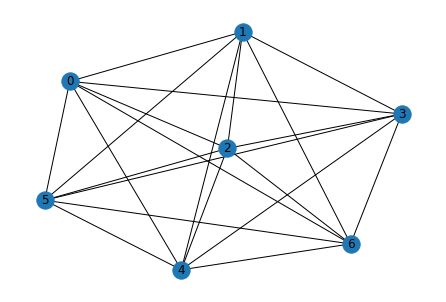

In [ ]:
nx_graph = nx.from_numpy_array(sim_mat)
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True)
plt.show()

In [ ]:
scores = nx.pagerank(nx_graph)

In [ ]:
scores

{0: 0.1475922060795174,
 1: 0.14128764759213522,
 2: 0.152589961156465,
 3: 0.12614959775525544,
 4: 0.15444867199080023,
 5: 0.13938369183187654,
 6: 0.13854822359395028}

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)

In [ ]:
ranked_sentences

[(0.15444867199080023,
  'As it tracked southeastwards, Dumazile weakened steadily over the next couple of days due to wind shear, and became a post-tropical cyclone on 7 March before completely dissipating on 10 March.'),
 (0.152589961156465,
  'It became a tropical disturbance on 2 March, and was named the next day after attaining tropical storm status.'),
 (0.1475922060795174,
  'Cyclone Dumazile was a strong tropical cyclone in the South-West Indian Ocean that affected Madagascar and Réunion in early March 2018.'),
 (0.14128764759213522,
  'Dumazile originated from a low-pressure area that formed near Agaléga on 27 February.'),
 (0.13938369183187654,
  'Dumazile dropped torrential rainfall in Réunion and Madagascar—reaching 1,600 mm (63 in) in Salazie and 210 mm (8.3 in) in northeastern Madagascar—causing widespread flooding and damaging crops and infrastructure.'),
 (0.13854822359395028,
  'Two deaths were caused by Dumazile, both in Madagascar.'),
 (0.12614959775525544,
  'Dumazi

In [ ]:
for i in range(3):
  print(ranked_sentences[i][1])

As it tracked southeastwards, Dumazile weakened steadily over the next couple of days due to wind shear, and became a post-tropical cyclone on 7 March before completely dissipating on 10 March.
It became a tropical disturbance on 2 March, and was named the next day after attaining tropical storm status.
Cyclone Dumazile was a strong tropical cyclone in the South-West Indian Ocean that affected Madagascar and Réunion in early March 2018.
